In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt

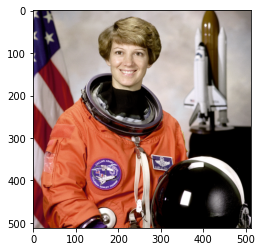

In [33]:
# load image
img = skimage.data.astronaut()
smaller_img = resize(img, (64, 64))
plt.imshow(img)

In [34]:
def get_arbitrary_mgrid(sidelen, limits=(-1, 1)):
    '''Generates an arbitrary flattened grid of (x,y,...) coordinates of specified limits.'''
    width = np.linspace(*limits, sidelen)
    height = np.linspace(*limits, sidelen)
    mgrid = np.stack(np.meshgrid(width, height), axis=-1)
    mgrid = np.reshape(mgrid, [-1, 2])
    return mgrid

In [35]:
# build dataset
image_side_length = smaller_img.shape[0]
X = get_arbitrary_mgrid(image_side_length)  # XY
y = tf.reshape(smaller_img, [-1, 3])  # RGB

In [ ]:
# our model which maps (X,Y) -> (R,G,B) 
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),  # add 2 more layers
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
4096/4096 [==============================] - 18s 4ms/step - loss: 0.0750
Epoch 2/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0595
Epoch 3/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0535
Epoch 4/10
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0515
Epoch 5/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0502
Epoch 6/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0493
Epoch 7/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0485
Epoch 8/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0479
Epoch 9/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0474
Epoch 10/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0470


In [36]:
def view_output(prediction, image_shape=(64,64,3)):
    # Reshape it from 1D to 2D
    reconstructed_img = tf.reshape(prediction, image_shape)
    
    # Scale the values from [0,1] to [0, 255]
    reconstructed_img *= 255
    
    # Convert the tensor into a numpy array, and cast the type into a uint8.
    reconstructed_img = reconstructed_img.numpy().astype(np.uint8)
    
    # Look at our creation next to the original!
    fig, axes_array = plt.subplots(1,3, figsize=(20,10))
    axes_array[0].imshow(img)
    axes_array[1].imshow(smaller_img)
    axes_array[2].imshow(reconstructed_img)
    plt.show()
    


128/128 [==============================] - 0s 2ms/step


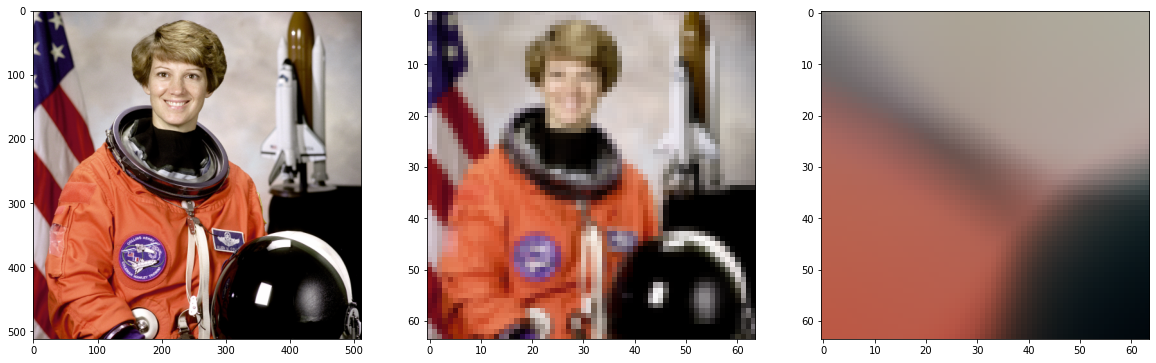

In [ ]:
prediction = model.predict(X)
view_output(prediction)

In [ ]:
# experiment with alternative activation functions
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='sigmoid'),  # add 2 more layers
    Dense(32, activation='sigmoid'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='sgd')

In [ ]:
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0823
Epoch 2/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0810
Epoch 3/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0808
Epoch 4/10
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0808
Epoch 5/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0806
Epoch 6/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0805
Epoch 7/10
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0802
Epoch 8/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0798
Epoch 9/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0792
Epoch 10/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0784


128/128 [==============================] - 0s 2ms/step


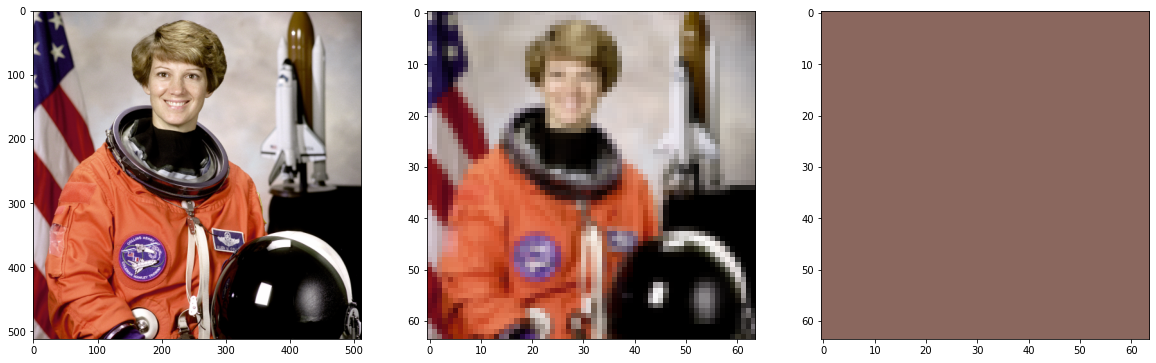

In [ ]:
prediction = model.predict(X)
view_output(prediction)

In [37]:
# experiment with alternative activation functions
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),  # add 2 more layers
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [38]:
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
4096/4096 [==============================] - 16s 4ms/step - loss: 0.0521
Epoch 2/10
4096/4096 [==============================] - 30s 7ms/step - loss: 0.0440
Epoch 3/10
4096/4096 [==============================] - 18s 4ms/step - loss: 0.0400
Epoch 4/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0378
Epoch 5/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0363
Epoch 6/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0346
Epoch 7/10
4096/4096 [==============================] - 8s 2ms/step - loss: 0.0328
Epoch 8/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0309
Epoch 9/10
4096/4096 [==============================] - 10s 2ms/step - loss: 0.0292
Epoch 10/10
4096/4096 [==============================] - 9s 2ms/step - loss: 0.0280


128/128 [==============================] - 0s 2ms/step


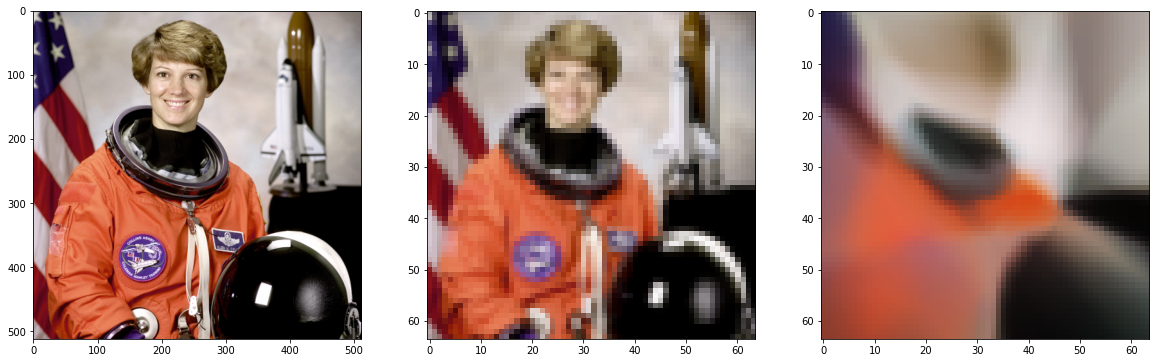

In [39]:
prediction = model.predict(X)
view_output(prediction)

512/512 [==============================] - 3s 5ms/step


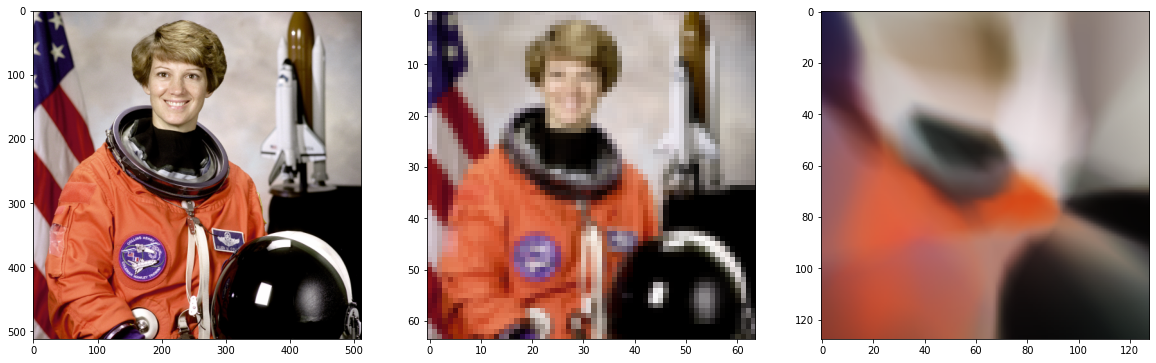

In [41]:
# inscrease the resolution of output images
arbitrary_X = get_arbitrary_mgrid(128, limits=(-1, 1))
arbitrary_prediction = model.predict(arbitrary_X)
view_output(arbitrary_prediction, image_shape=(128, 128, 3))

In the created image, the pixel values of adjacent coordinates are close to each other, and the images appear to be side by side, with different patterns in different places. However, in the real image, the pixel values may change dramatically.